# Setup

In [49]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt

import plotly.graph_objects as go
#import plotly.express as pxd

 
from wordcloud import WordCloud
from IPython.display import Image

# pd.set_option('display.max_rows', None)
#  pd.set_option('display.max_columns', None)
%matplotlib inline

In [50]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Import Dataset

In [51]:
df_train = pd.read_csv("/content/drive/MyDrive/GoEmotions/data/train.tsv", sep='\t', header=None, names=['Text', 'Class', 'ID'])
df_dev = pd.read_csv("/content/drive/MyDrive/GoEmotions/data/dev.tsv", sep='\t', header=None, names=['Text', 'Class', 'ID'])
df_test = pd.read_csv("/content/drive/MyDrive/GoEmotions/data/test.tsv", sep='\t', header=None, names=['Text', 'Class', 'ID'])

In [52]:
df = pd.concat([df_train, df_dev, df_test])

In [53]:
df.head()

,Text,Class,ID
0,My favourite food is anything I didn't have to...,27,eebbqej
1,"Now if he does off himself, everyone will thin...",27,ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
3,To make her feel threatened,14,ed7ypvh
4,Dirty Southern Wankers,3,ed0bdzj


In [54]:
df.describe()

,Text,Class,ID
count,54263,54263,54263
unique,53994,782,54263
top,Thank you.,27,eebbqej
freq,15,16021,1


In [55]:
# Count total NaN in a DataFrame
print(" \nCount total NaN in a DataFrame : \n\n",
       df.isnull().sum().sum())

 
Count total NaN in a DataFrame : 

 0


## Data Processing

In [56]:
df['List of classes'] = df['Class'].apply(lambda x: x.split(','))

In [57]:
df['Len of classes'] = df['List of classes'].apply(lambda x: len(x))

In [58]:
df[df['Len of classes'] == 5]

,Text,Class,ID,List of classes,Len of classes
7873,Yeah I probably would've started crying on the...,"9,12,14,19,25",ee6lqiq,"[9, 12, 14, 19, 25]",5


In [59]:
temp_df = df["Len of classes"].value_counts().sort_index()

trace1 = go.Bar(
                x = ['1','2','3','4','5'],
                y = temp_df.tolist(),
                marker = dict(color = 'rgb(250,13,92)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_df.tolist(), textposition='outside',
                width=[0.5, 0.5, 0.5, 0.5, 0.5])
layout = go.Layout(template= "plotly_dark",title = 'Number of classes' , xaxis = dict(title = 'Class Numbers'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [60]:
# remove values with more than one class
def filter_rows_by_values(df, col, values):
    return df[~df[col].isin(values)]

df = filter_rows_by_values(df, "Len of classes", ["2","3","4","5"])

In [61]:
df.head()

,Text,Class,ID,List of classes,Len of classes
0,My favourite food is anything I didn't have to...,27,eebbqej,[27],1
1,"Now if he does off himself, everyone will thin...",27,ed00q6i,[27],1
2,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj,[2],1
3,To make her feel threatened,14,ed7ypvh,[14],1
4,Dirty Southern Wankers,3,ed0bdzj,[3],1


In [62]:
emotions_map = {}

In [63]:
with open('/content/drive/MyDrive/GoEmotions/data/emotions.txt', 'r') as f:
    for i,emotion in enumerate(f):
        emotions_map[str(i)] = emotion.strip()

In [64]:
emotions_map

{'0': 'admiration',
 '1': 'amusement',
 '10': 'disapproval',
 '11': 'disgust',
 '12': 'embarrassment',
 '13': 'excitement',
 '14': 'fear',
 '15': 'gratitude',
 '16': 'grief',
 '17': 'joy',
 '18': 'love',
 '19': 'nervousness',
 '2': 'anger',
 '20': 'optimism',
 '21': 'pride',
 '22': 'realization',
 '23': 'relief',
 '24': 'remorse',
 '25': 'sadness',
 '26': 'surprise',
 '27': 'neutral',
 '3': 'annoyance',
 '4': 'approval',
 '5': 'caring',
 '6': 'confusion',
 '7': 'curiosity',
 '8': 'desire',
 '9': 'disappointment'}

In [65]:
for i in emotions_map:
    df[emotions_map[i]] = df['List of classes'].apply(lambda x: 1 if i in x else 0)

In [66]:
temp_df = df.copy()
temp_df.drop(['Class', 'ID', 'List of classes', 'Len of classes'], axis=1, inplace =True)

In [67]:
emotion_list = list(emotions_map.values())

In [68]:
temp_list = temp_df.drop(['Text'], axis=1).sum(axis=0).tolist()
trace1 = go.Bar(
                x = emotion_list,
                y = temp_list,
                marker = dict(color = 'rgb(127, 16, 238)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text=temp_list, textposition='outside')
layout = go.Layout(template= "plotly_dark",title = 'NUMBER OF EMOTIONS' , xaxis = dict(title = 'Emotion'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1], layout = layout)
fig.show()

In [69]:
lst = [str(i) for i in list(range(1,27))]

In [70]:
df.loc[~(df["Class"].isin(lst)), 'sentiment'] = '1'
df.loc[(df["Class"] == '27'), 'sentiment'] = '0'

In [71]:
print(df[ df['sentiment'] == '1'].size)
print(df[ df['sentiment'] == '0'].size)

414834
544714


In [72]:
df = df[['Text','sentiment']]
df

,Text,sentiment
0,My favourite food is anything I didn't have to...,0
1,"Now if he does off himself, everyone will thin...",0
2,WHY THE FUCK IS BAYLESS ISOING,NaN
3,To make her feel threatened,NaN
4,Dirty Southern Wankers,NaN
...,...,...
5422,Thanks. I was diagnosed with BP 1 after the ho...,NaN
5423,Well that makes sense.,NaN
5424,Daddy issues [NAME],0
5425,So glad I discovered that subreddit a couple m...,1


In [73]:
# Count total NaN in a DataFrame
print(" \nCount total NaN in a DataFrame : \n\n",
       df.isnull().sum().sum())

 
Count total NaN in a DataFrame : 

 26041


In [ ]:
df.dropna()

,Text,sentiment
0,My favourite food is anything I didn't have to...,0
1,"Now if he does off himself, everyone will thin...",0
2,WHY THE FUCK IS BAYLESS ISOING,1
3,To make her feel threatened,1
4,Dirty Southern Wankers,1
...,...,...
5421,Easy just include [NAME] to continue to tormen...,0
5422,Thanks. I was diagnosed with BP 1 after the ho...,1
5423,Well that makes sense.,1
5424,Daddy issues [NAME],0


In [ ]:
#Summary of the dataset
df.describe()

,Text,sentiment
count,54263,42062
unique,53994,2
top,Thank you.,1
freq,15,26041


In [ ]:
#sentiment count
df['sentiment'].value_counts()

1    26041
0    16021
Name: sentiment, dtype: int64

## One-hot encoding

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

feature_column = "Text"
 
df['sentiment'].value_counts()

vectorizer = TfidfVectorizer(max_features= 3000, analyzer='word', token_pattern=r'\S+')
experimental_feature = df[feature_column].to_list()
labels = df['sentiment'].to_list()
vectors = vectorizer.fit_transform(experimental_feature)
print(df[feature_column].head(), df.shape, sep="\n")
X_train, X_test, y_train, y_test = train_test_split(
    vectors, labels, test_size=0.33, random_state=42)

0    My favourite food is anything I didn't have to...
1    Now if he does off himself, everyone will thin...
2                       WHY THE FUCK IS BAYLESS ISOING
3                          To make her feel threatened
4                               Dirty Southern Wankers
Name: Text, dtype: object
(54263, 2)


In [ ]:
X_train.shape

(36356, 3000)

In [ ]:
X_test.shape

(17907, 3000)

In [ ]:
X_train

<36356x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 363680 stored elements in Compressed Sparse Row format>

# Modeling

## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
# Predict on the test set results
y_pred = rf.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score
print(format(accuracy_score(y_test, y_pred)))

0.5587758976936393


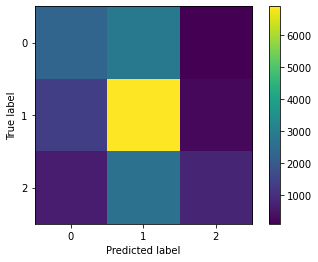

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

# print('Confusion matrix\n\n', cm) 
ConfusionMatrixDisplay(cm).plot(include_values=False)

In [ ]:
pd.DataFrame(y_pred).value_counts()

1      12429
0       4299
nan     1179
dtype: int64

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.44      0.48      5290
           1       0.55      0.81      0.66      8517
         nan       0.68      0.20      0.30      4100

    accuracy                           0.56     17907
   macro avg       0.59      0.48      0.48     17907
weighted avg       0.58      0.56      0.53     17907



In [ ]:
y_score = rf.predict_proba(X_test)

In [ ]:
y_test 

In [ ]:
from sklearn.metrics import top_k_accuracy_score
y_test
y_score
top_k_accuracy_score(y_test, y_score, k=2)



0.8564248617858938

## Linear Support Vector Classifier

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train,y_train)

LinearSVC()

In [ ]:
clf.score(X_test,y_test)

0.5667616016083096

In [ ]:
predictions = clf.predict(X_test)
pd.DataFrame(predictions).value_counts()

1      10379
0       5566
nan     1962
dtype: int64

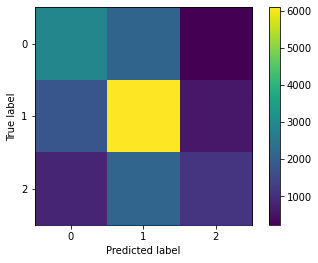

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)

# print('Confusion matrix\n\n', cm)
ConfusionMatrixDisplay(cm).plot(include_values=False)

## Naive Bayes Classifier

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# X_train.todense()
# instantiate the model
gnb = GaussianNB(var_smoothing = 1e-5)

# fit the model
gnb.fit(X_train.todense(), y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



GaussianNB(var_smoothing=1e-05)

In [ ]:
y_score = gnb.predict_proba(X_test.todense())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



In [ ]:
from sklearn.metrics import top_k_accuracy_score
y_test
y_score
top_k_accuracy_score(y_test, y_score, k=2)


0.735857485899369

In [ ]:
y_pred = gnb.predict(X_test.todense())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Compare the train-set and test-set accuracy
y_pred_train = gnb.predict(X_train.todense())

y_pred_train

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



array(['0', 'nan', '1', ..., 'nan', '0', '1'], dtype='<U3')

In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train.todense(), y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test.todense(), y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



Training set score: 0.4863


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning:

np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html



Test set score: 0.4120


## XGBoost

In [ ]:
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
print(model)

XGBClassifier(objective='multi:softprob')


In [ ]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 41.20%
